In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer
import scipy.stats as stat
import pylab 

# **All Types of Data Transformations:**

In [2]:
data = pd.read_excel('randomDataP.xlsx')
data.head(10)

,fea1,fea2,fea3,output
0,-1,14,-3,1
1,31,123,1,1
2,-11,28,-5,0
3,47,16,2,0
4,-37,37,-5,1
5,-24,213,0,1
6,-2,22,-4,0
7,-50,24,-5,1
8,-5,37,2,0
9,26,-9,0,1


In [3]:
data.isnull().sum()

fea1      0
fea2      0
fea3      0
output    0
dtype: int64

In [4]:
def check_mean_std(data):
  for col in data.columns:
    print(f"Mean value of: {col} is {data[col].mean()} and standard deviatio is {data[col].std()}")

def get_mean_std_value(data, col):
  print(f"Mean value of {col} is: {data[col].mean()} and Standard Deviation is: {data[col].std()}")

In [5]:
check_mean_std(data)

Mean value of: fea1 is 25.156164383561645 and standard deviatio is 327.8459840869657
Mean value of: fea2 is 98156.40547945205 and standard deviatio is 1856472.0376799714
Mean value of: fea3 is 3.7616438356164386 and standard deviatio is 33.627658316983464
Mean value of: output is 0.5013698630136987 and standard deviatio is 0.5006844630172261


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lo

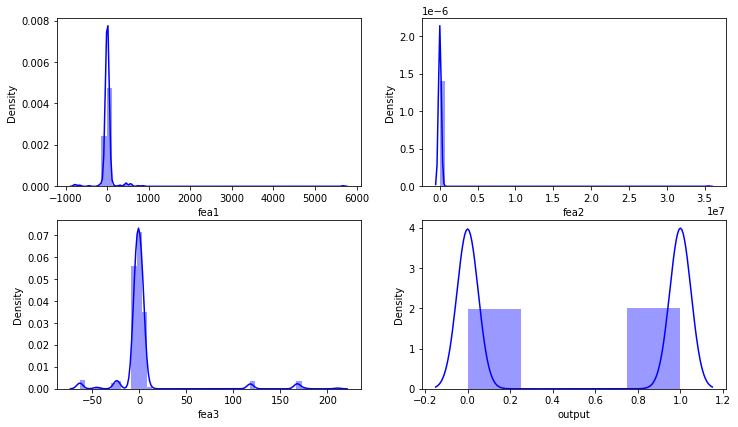

In [6]:
plt.figure(figsize=(12,18))
plotnumber = 1

for column in data:
    if plotnumber<=5 :
        ax = plt.subplot(5, 2, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1}, color='blue')
        plt.xlabel(column, fontsize=10)
    plotnumber+=1
plt.show()

## **1. Normalization (Min Max Scaler)**
here by default **data** **range** will be **0** to **1**.

In [7]:
def Min_max_scaler(data, col):
  scaler = MinMaxScaler()
  data[col+'_MinMaxScaler'] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))


In [8]:
Min_max_scaler(data, 'fea1')
data.head(20)

,fea1,fea2,fea3,output,fea1_MinMaxScaler
0,-1,14,-3,1,0.121362
1,31,123,1,1,0.126316
2,-11,28,-5,0,0.119814
3,47,16,2,0,0.128793
4,-37,37,-5,1,0.115789
5,-24,213,0,1,0.117802
6,-2,22,-4,0,0.121207
7,-50,24,-5,1,0.113777
8,-5,37,2,0,0.120743
9,26,-9,0,1,0.125542


In [9]:
# Print Mean and Standard deviation value and compare:
get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_MinMaxScaler')

Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_MinMaxScaler is: 0.1254111709572076 and Standard Deviation is: 0.05075015233544359


In [10]:
def Show_Distribution_Curve(data, col):
  plt.figure(figsize=(6,3))
  sns.distplot(data[col], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
  
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


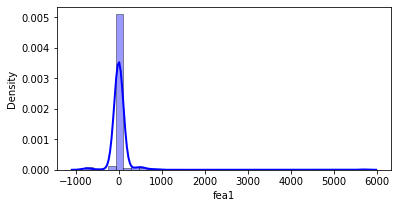

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


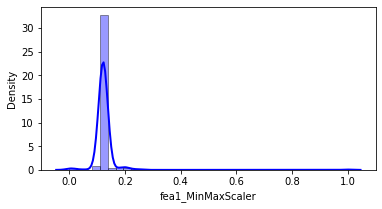

In [11]:
Show_Distribution_Curve(data, 'fea1')
Show_Distribution_Curve(data, 'fea1_MinMaxScaler')

## **2. Min Max scaler with given range**

In [12]:
def Min_max_scaler_withRange(data, col, lr, up):
  scaler = MinMaxScaler(feature_range=(lr,up))
  data[col+'_MinMaxScaler_'+str(lr)+'_to_'+str(up)] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))


In [13]:
Min_max_scaler_withRange(data, 'fea1', lr=5, up=10)
data.head(10)

,fea1,fea2,fea3,output,fea1_MinMaxScaler,fea1_MinMaxScaler_5_to_10
0,-1,14,-3,1,0.121362,5.606811
1,31,123,1,1,0.126316,5.631579
2,-11,28,-5,0,0.119814,5.599071
3,47,16,2,0,0.128793,5.643963
4,-37,37,-5,1,0.115789,5.578947
5,-24,213,0,1,0.117802,5.589009
6,-2,22,-4,0,0.121207,5.606037
7,-50,24,-5,1,0.113777,5.568885
8,-5,37,2,0,0.120743,5.603715
9,26,-9,0,1,0.125542,5.627709


In [14]:
# Print Mean and Standard deviation value and compare:
get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_MinMaxScaler')
get_mean_std_value(data, 'fea1_MinMaxScaler_5_to_10')

Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_MinMaxScaler is: 0.1254111709572076 and Standard Deviation is: 0.05075015233544359
Mean value of fea1_MinMaxScaler_5_to_10 is: 5.627055854786044 and Standard Deviation is: 0.253750761677218


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


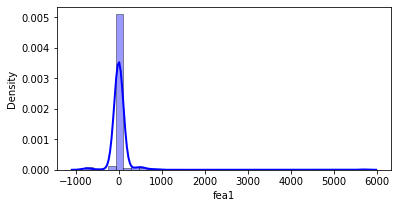

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


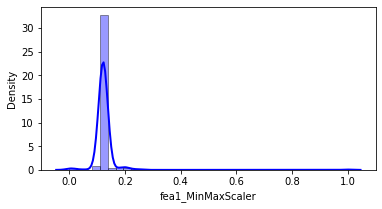

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


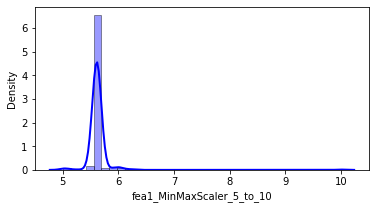

In [16]:
Show_Distribution_Curve(data, 'fea1')
Show_Distribution_Curve(data, 'fea1_MinMaxScaler')
Show_Distribution_Curve(data, 'fea1_MinMaxScaler_5_to_10')

## **3. Standarization or Standard Scaler**

In [18]:
def standard_scaler(data, col):
  scaler = StandardScaler()
  data[col+'_standarization'] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))


In [19]:
standard_scaler(data, 'fea1')
data.head(15)

,fea1,fea2,fea3,output,fea1_MinMaxScaler,fea1_MinMaxScaler_5_to_10,fea1_standarization
0,-1,14,-3,1,0.121362,5.606811,-0.079891
1,31,123,1,1,0.126316,5.631579,0.017849
2,-11,28,-5,0,0.119814,5.599071,-0.110435
3,47,16,2,0,0.128793,5.643963,0.066720
4,-37,37,-5,1,0.115789,5.578947,-0.189850
5,-24,213,0,1,0.117802,5.589009,-0.150143
6,-2,22,-4,0,0.121207,5.606037,-0.082946
7,-50,24,-5,1,0.113777,5.568885,-0.229557
8,-5,37,2,0,0.120743,5.603715,-0.092109
9,26,-9,0,1,0.125542,5.627709,0.002577


In [20]:
# Print Mean and Standard deviation value and compare after standarization:
get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_standarization')

Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_standarization is: -1.8858582884043755e-17 and Standard Deviation is: 1.0013726842426116


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


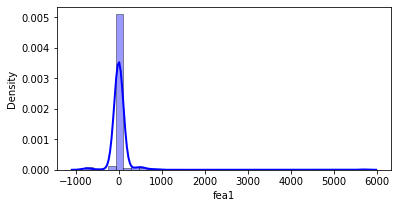

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


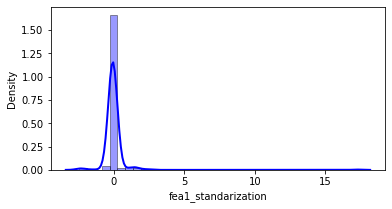

In [21]:
Show_Distribution_Curve(data, 'fea1')
Show_Distribution_Curve(data, 'fea1_standarization')

## **4. MaxAbsScaler**

In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1]. 

In [23]:
def Max_Abs_Scaler(data, col):
  scaler = MaxAbsScaler()
  data[col+'_MaxAbsScaler'] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))
  

In [24]:
Max_Abs_Scaler(data, 'fea1')
data.head(15)

,fea1,fea2,fea3,output,fea1_MinMaxScaler,fea1_MinMaxScaler_5_to_10,fea1_standarization,fea1_MaxAbsScaler
0,-1,14,-3,1,0.121362,5.606811,-0.079891,-0.000176
1,31,123,1,1,0.126316,5.631579,0.017849,0.005463
2,-11,28,-5,0,0.119814,5.599071,-0.110435,-0.001938
3,47,16,2,0,0.128793,5.643963,0.066720,0.008282
4,-37,37,-5,1,0.115789,5.578947,-0.189850,-0.006520
5,-24,213,0,1,0.117802,5.589009,-0.150143,-0.004229
6,-2,22,-4,0,0.121207,5.606037,-0.082946,-0.000352
7,-50,24,-5,1,0.113777,5.568885,-0.229557,-0.008811
8,-5,37,2,0,0.120743,5.603715,-0.092109,-0.000881
9,26,-9,0,1,0.125542,5.627709,0.002577,0.004581


In [25]:
# Print Mean and Standard deviation value and compare after MaxAbsScaler scaling: 
get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_MaxAbsScaler')


Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_MaxAbsScaler is: 0.004432804296662845 and Standard Deviation is: 0.057770217460258254


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


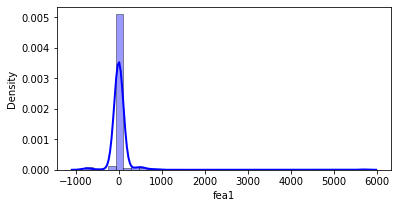

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


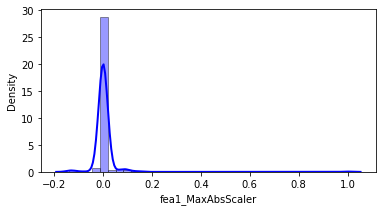

In [26]:
Show_Distribution_Curve(data, 'fea1')
Show_Distribution_Curve(data, 'fea1_MaxAbsScaler')

## **5. Robust Scaler:**

If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers.

If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

      1. removes the median from the data
      2. scales the data by the InterQuartile Range(IQR)

In [28]:
def Robust_Scaler(data, col):
  scaler = RobustScaler()
  data[col+'_RobustScaler'] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))
  

In [29]:
Robust_Scaler(data, 'fea1')
data.head(15)

,fea1,fea2,fea3,output,fea1_MinMaxScaler,fea1_MinMaxScaler_5_to_10,fea1_standarization,fea1_MaxAbsScaler,fea1_RobustScaler
0,-1,14,-3,1,0.121362,5.606811,-0.079891,-0.000176,-0.12
1,31,123,1,1,0.126316,5.631579,0.017849,0.005463,0.52
2,-11,28,-5,0,0.119814,5.599071,-0.110435,-0.001938,-0.32
3,47,16,2,0,0.128793,5.643963,0.066720,0.008282,0.84
4,-37,37,-5,1,0.115789,5.578947,-0.189850,-0.006520,-0.84
5,-24,213,0,1,0.117802,5.589009,-0.150143,-0.004229,-0.58
6,-2,22,-4,0,0.121207,5.606037,-0.082946,-0.000352,-0.14
7,-50,24,-5,1,0.113777,5.568885,-0.229557,-0.008811,-1.10
8,-5,37,2,0,0.120743,5.603715,-0.092109,-0.000881,-0.20
9,26,-9,0,1,0.125542,5.627709,0.002577,0.004581,0.42


In [30]:
# Print Mean and Standard deviation value and compare after Robust Scaler scaling: 
get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_RobustScaler')


Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_RobustScaler is: 0.4031232876712327 and Standard Deviation is: 6.556919681739313


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


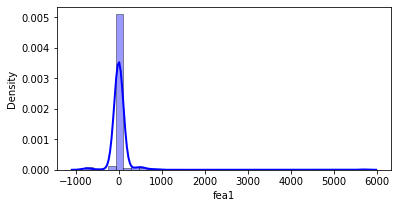

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


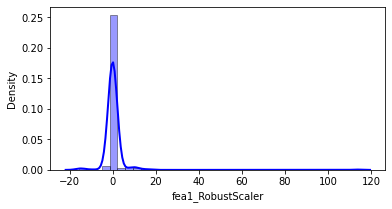

In [31]:
Show_Distribution_Curve(data, 'fea1')
Show_Distribution_Curve(data, 'fea1_RobustScaler')

## **6. Quantile Transformer Scaler:**

One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

    1. It computes the cumulative distribution function of the variable

    2. It uses this cdf to map the values to a normal distribution

    3. Maps the obtained values to the desired output  distribution using the associated quantile function



In [33]:
def Quantile_Scaler(data, col):
  scaler = QuantileTransformer()
  data[col+'_QuantileScaler'] = scaler.fit_transform(np.array(data[col]).reshape(-1,1))

In [34]:
Quantile_Scaler(data, 'fea1')
data.head(15)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (365). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


,fea1,fea2,fea3,output,fea1_MinMaxScaler,fea1_MinMaxScaler_5_to_10,fea1_standarization,fea1_MaxAbsScaler,fea1_RobustScaler,fea1_QuantileScaler
0,-1,14,-3,1,0.121362,5.606811,-0.079891,-0.000176,-0.12,0.425824
1,31,123,1,1,0.126316,5.631579,0.017849,0.005463,0.52,0.766484
2,-11,28,-5,0,0.119814,5.599071,-0.110435,-0.001938,-0.32,0.329670
3,47,16,2,0,0.128793,5.643963,0.066720,0.008282,0.84,0.901099
4,-37,37,-5,1,0.115789,5.578947,-0.189850,-0.006520,-0.84,0.137363
5,-24,213,0,1,0.117802,5.589009,-0.150143,-0.004229,-0.58,0.236264
6,-2,22,-4,0,0.121207,5.606037,-0.082946,-0.000352,-0.14,0.412088
7,-50,24,-5,1,0.113777,5.568885,-0.229557,-0.008811,-1.10,0.042582
8,-5,37,2,0,0.120743,5.603715,-0.092109,-0.000881,-0.20,0.370879
9,26,-9,0,1,0.125542,5.627709,0.002577,0.004581,0.42,0.707418


In [35]:
# Print Mean and Standard deviation value and compare after Quantile Scaler scaling: 
get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_QuantileScaler')


Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_QuantileScaler is: 0.49940538913141647 and Standard Deviation is: 0.28992065606414014


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


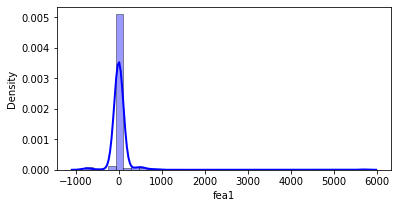

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


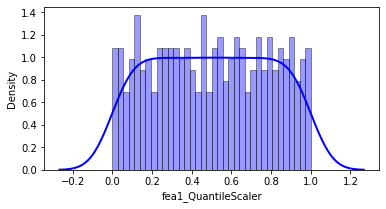

In [36]:
Show_Distribution_Curve(data, 'fea1')
Show_Distribution_Curve(data, 'fea1_QuantileScaler')

# **All Type Of Scaling Techniques**

**Guassian Transformation:** Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

In [37]:
data = pd.read_excel('randomDataP.xlsx')
data.head(10)

,fea1,fea2,fea3,output
0,-1,14,-3,1
1,31,123,1,1
2,-11,28,-5,0
3,47,16,2,0
4,-37,37,-5,1
5,-24,213,0,1
6,-2,22,-4,0
7,-50,24,-5,1
8,-5,37,2,0
9,26,-9,0,1


In [40]:
def QQ_Plot(data,col):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[col].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[col],dist='norm',plot=pylab)
    plt.show()


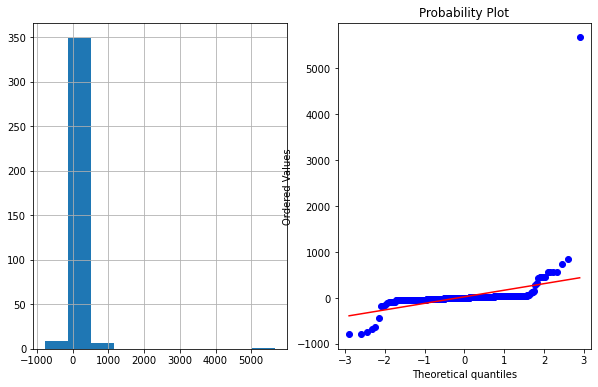

In [41]:
QQ_Plot(data, 'fea1')

## **1. Log Transformation:**

In [38]:
def Log_Transformatio(data,col):
  data[col+'_logTransform'] = np.log(data[col])

In [44]:
Log_Transformatio(data, 'fea1')
data.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fea1,fea2,fea3,output,fea1_logTransform
0,-1,14,-3,1,NaN
1,31,123,1,1,3.433987
2,-11,28,-5,0,NaN
3,47,16,2,0,3.850148
4,-37,37,-5,1,NaN


In [45]:
data.fillna(method='bfill', inplace=True)
data.head(15)

,fea1,fea2,fea3,output,fea1_logTransform
0,-1,14,-3,1,3.433987
1,31,123,1,1,3.433987
2,-11,28,-5,0,3.850148
3,47,16,2,0,3.850148
4,-37,37,-5,1,3.258097
5,-24,213,0,1,3.258097
6,-2,22,-4,0,3.258097
7,-50,24,-5,1,3.258097
8,-5,37,2,0,3.258097
9,26,-9,0,1,3.258097


In [46]:
# Print the mean and standard deviation value after log transformatio:

get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_logTransform') 

# here, my custom data set is not good, that's why I get infinity value

Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_logTransform is: -inf and Standard Deviation is: nan


In [48]:
QQ_Plot(data, 'fea1_logTransform')

# becz of infinity value, it's showing error otherwise all good

## **2. Recipocal Transformation:**

reciTrans = (1/value)

In [49]:
def Recipocal_Transformation(data, col):
  data[col+'_ReciTransform'] = 1/data[col]

In [50]:
Recipocal_Transformation(data, 'fea1')
data.head(10)

,fea1,fea2,fea3,output,fea1_logTransform,fea1_ReciTransform
0,-1,14,-3,1,3.433987,-1.000000
1,31,123,1,1,3.433987,0.032258
2,-11,28,-5,0,3.850148,-0.090909
3,47,16,2,0,3.850148,0.021277
4,-37,37,-5,1,3.258097,-0.027027
5,-24,213,0,1,3.258097,-0.041667
6,-2,22,-4,0,3.258097,-0.500000
7,-50,24,-5,1,3.258097,-0.020000
8,-5,37,2,0,3.258097,-0.200000
9,26,-9,0,1,3.258097,0.038462


In [53]:
# Print the mean and standard deviation value after recipocal transformatio:

get_mean_std_value(data, 'fea1')
get_mean_std_value(data, 'fea1_logTransform') 

# here, my custom data set is not good, that's why I get infinity value

Mean value of fea1 is: 25.156164383561645 and Standard Deviation is: 327.8459840869657
Mean value of fea1_logTransform is: -inf and Standard Deviation is: nan


In [52]:
QQ_Plot(data, 'fea1_ReciTransform')

# becz of infinity value, it's showing error otherwise all good

## **3. Square Root Transformation**

In [54]:
def Square_Root_Transformation(data, col):
  data[col+'_SqTransform'] = np.sqrt(data[col])
  

In [56]:
Square_Root_Transformation(data, 'fea1')
data.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fea1,fea2,fea3,output,fea1_logTransform,fea1_ReciTransform,fea1_SqTransform
0,-1,14,-3,1,3.433987,-1.000000,NaN
1,31,123,1,1,3.433987,0.032258,5.567764
2,-11,28,-5,0,3.850148,-0.090909,NaN
3,47,16,2,0,3.850148,0.021277,6.855655
4,-37,37,-5,1,3.258097,-0.027027,NaN
5,-24,213,0,1,3.258097,-0.041667,NaN
6,-2,22,-4,0,3.258097,-0.500000,NaN
7,-50,24,-5,1,3.258097,-0.020000,NaN
8,-5,37,2,0,3.258097,-0.200000,NaN
9,26,-9,0,1,3.258097,0.038462,5.099020


## **4. Box-Cox Transformation:**

In [59]:
def Box_Cox_Transformation(data, col):
  data[col+'_BoxCox_transforms'], parameter = stat.boxcox(data[col])

In [61]:
Box_Cox_Transformation(data, 'fea1')

# Here it's showing error becz data should be positive

## **5. Others Transformation**

      1. **Exponential Transformation,**
      2. **Square Tranformation, etc.**
      
Everything depends on problem Statements